In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
!pip install scikit-learn==0.24

     |████████████████████████████████| 22.3MB 1.5MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 7.5MB/s 
     |████████████████████████████████| 9.5MB 26.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [5]:
filename = "/content/gdrive/My Drive/BITS/4-2/ASM_sop/Karnataka1/dataset.csv"
# The data of all the files from year 2000-2014 of AP have been combined and put into one file called Dataset
df = pd.read_csv(filename)
df=df.iloc[:,:17]
df

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131395,2014,12,31,19,0,20,0,0,0,18,0,0,0,0,0,0,0
131396,2014,12,31,20,0,19,0,0,0,18,0,0,0,0,0,0,0
131397,2014,12,31,21,0,19,0,0,0,18,0,0,0,0,0,0,0
131398,2014,12,31,22,0,19,0,0,0,18,0,0,0,0,0,0,0


In [6]:
df['Date']=df['Year'].astype(str) + df['Month'].astype(str).str.zfill(2) + df['Day'].astype(str).str.zfill(2) + df['Hour'].astype(str).str.zfill(2)+df['Minute'].astype(str)

df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d%H%M')
df.head(10)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Dew Point,DHI,DHI Perez,DNI,DNI Perez,Fill Flag,GHI,GHI Perez,Date
0,2000,1,1,0,0,13,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 00:00:00
1,2000,1,1,1,0,14,0,0,0,13,0,0,0,0,0,0,0,2000-01-01 01:00:00
2,2000,1,1,2,0,15,58,323,109,13,58,63,323,297,0,109,110,2000-01-01 02:00:00
3,2000,1,1,3,0,18,108,611,335,14,108,99,611,657,0,335,343,2000-01-01 03:00:00
4,2000,1,1,4,0,21,136,749,549,14,136,118,749,790,0,549,554,2000-01-01 04:00:00
5,2000,1,1,5,0,23,153,821,718,14,153,129,821,859,0,718,721,2000-01-01 05:00:00
6,2000,1,1,6,0,24,162,856,822,14,162,160,856,861,0,822,825,2000-01-01 06:00:00
7,2000,1,1,7,0,25,164,863,852,14,258,258,677,677,0,798,798,2000-01-01 07:00:00
8,2000,1,1,8,0,25,160,847,804,14,192,192,769,769,0,777,777,2000-01-01 08:00:00
9,2000,1,1,9,0,25,150,803,685,15,150,147,803,819,0,685,693,2000-01-01 09:00:00


In [7]:
X=df[['Date','GHI']]
X.set_index('Date',inplace=True)
print(X.shape)

(131400, 1)


In [8]:
#y=X['GHI']
X=X.between_time('08:00','17:00',include_start=True,include_end=True)
X=X.reset_index()
y=X.resample('D',on='Date').mean()
y=y.dropna()
#y=np.log(y+1)
#del X
#del df
#y.plot(figsize=[16,8],title='Time Series Plot')
y

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2014-12-27,217.0
2014-12-28,161.8
2014-12-29,183.2


In [9]:
y_w=y.resample('W-FRI').mean()
y_w

,GHI
Date,
2000-01-07,234.371429
2000-01-14,229.814286
2000-01-21,253.528571
2000-01-28,263.842857
2000-02-04,282.085714
...,...
2014-12-05,203.614286
2014-12-12,175.657143
2014-12-19,148.700000


In [10]:
y_w[:'2011']

,GHI
Date,
2000-01-07,234.371429
2000-01-14,229.814286
2000-01-21,253.528571
2000-01-28,263.842857
2000-02-04,282.085714
...,...
2011-12-02,146.985714
2011-12-09,188.671429
2011-12-16,197.128571


In [11]:
y[:4382]

,GHI
Date,
2000-01-01,231.1
2000-01-02,235.1
2000-01-03,228.3
2000-01-04,234.0
2000-01-05,235.3
...,...
2011-12-29,216.1
2011-12-30,72.1
2011-12-31,97.1


In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
type(y)

pandas.core.frame.DataFrame

In [14]:
X_T=[]
y=y.loc[:,'GHI']
y=y.values
for i in range(0,5474,7):
  X_add = y[i:i+7]
  X_T.append(X_add)
X_T=np.asarray(X_T)
X_T.shape

(782, 7)

In [15]:
Y_T=y_w.loc[:,'GHI']
Y_T=Y_T.values
#Y_T=Y_T.reshape(783,)
Y_T.shape

(783,)

In [16]:
type(X_T[:626])

numpy.ndarray

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation='relu', input_dim=7))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X_T[:626], Y_T[:626], epochs=2000, verbose=0)

In [18]:
# demonstrate prediction
yhat=[]

for i in range(626,782):
  x_input = X_T[i]
  x_input = x_input.reshape((1, 7))
  yRez = model.predict(x_input, verbose=0)
  print(yRez)
  yhat.append(yRez)
  #model.fit(X_T[:i], Y_T[:i], epochs=2000, verbose=0)

yhat

[[236.9571]]
[[231.84052]]
[[262.0043]]
[[263.6495]]
[[275.34424]]
[[258.84018]]
[[285.05823]]
[[295.82114]]
[[295.05347]]
[[295.70764]]
[[276.42862]]
[[296.18393]]
[[305.13126]]
[[284.78424]]
[[275.3659]]
[[275.76212]]
[[246.88449]]
[[288.2725]]
[[262.25568]]
[[274.95898]]
[[242.66151]]
[[280.1863]]
[[260.14633]]
[[213.74821]]
[[260.08493]]
[[238.25487]]
[[228.47221]]
[[250.05757]]
[[209.83435]]
[[247.83153]]
[[199.75215]]
[[238.48338]]
[[285.98834]]
[[232.20906]]
[[237.47586]]
[[206.0375]]
[[242.95946]]
[[238.83679]]
[[227.99173]]
[[225.85358]]
[[246.19864]]
[[183.08922]]
[[214.84724]]
[[60.392426]]
[[212.22684]]
[[217.11151]]
[[176.6154]]
[[210.58133]]
[[177.19977]]
[[210.43416]]
[[213.33382]]
[[192.98944]]
[[225.0391]]
[[247.61183]]
[[257.7885]]
[[267.99387]]
[[274.7529]]
[[237.38147]]
[[229.1572]]
[[301.17557]]
[[304.56558]]
[[238.71605]]
[[303.6055]]
[[293.03113]]
[[300.74286]]
[[295.85715]]
[[297.57812]]
[[299.25583]]
[[277.5057]]
[[274.70218]]
[[281.8641]]
[[268.22302]]
[[277.6

[array([[236.9571]], dtype=float32),
 array([[231.84052]], dtype=float32),
 array([[262.0043]], dtype=float32),
 array([[263.6495]], dtype=float32),
 array([[275.34424]], dtype=float32),
 array([[258.84018]], dtype=float32),
 array([[285.05823]], dtype=float32),
 array([[295.82114]], dtype=float32),
 array([[295.05347]], dtype=float32),
 array([[295.70764]], dtype=float32),
 array([[276.42862]], dtype=float32),
 array([[296.18393]], dtype=float32),
 array([[305.13126]], dtype=float32),
 array([[284.78424]], dtype=float32),
 array([[275.3659]], dtype=float32),
 array([[275.76212]], dtype=float32),
 array([[246.88449]], dtype=float32),
 array([[288.2725]], dtype=float32),
 array([[262.25568]], dtype=float32),
 array([[274.95898]], dtype=float32),
 array([[242.66151]], dtype=float32),
 array([[280.1863]], dtype=float32),
 array([[260.14633]], dtype=float32),
 array([[213.74821]], dtype=float32),
 array([[260.08493]], dtype=float32),
 array([[238.25487]], dtype=float32),
 array([[228.47221

In [19]:
y_w[626:-2].index

DatetimeIndex(['2012-01-06', '2012-01-13', '2012-01-20', '2012-01-27',
               '2012-02-03', '2012-02-10', '2012-02-17', '2012-02-24',
               '2012-03-02', '2012-03-09',
               ...
               '2014-10-17', '2014-10-24', '2014-10-31', '2014-11-07',
               '2014-11-14', '2014-11-21', '2014-11-28', '2014-12-05',
               '2014-12-12', '2014-12-19'],
              dtype='datetime64[ns]', name='Date', length=155, freq='W-FRI')

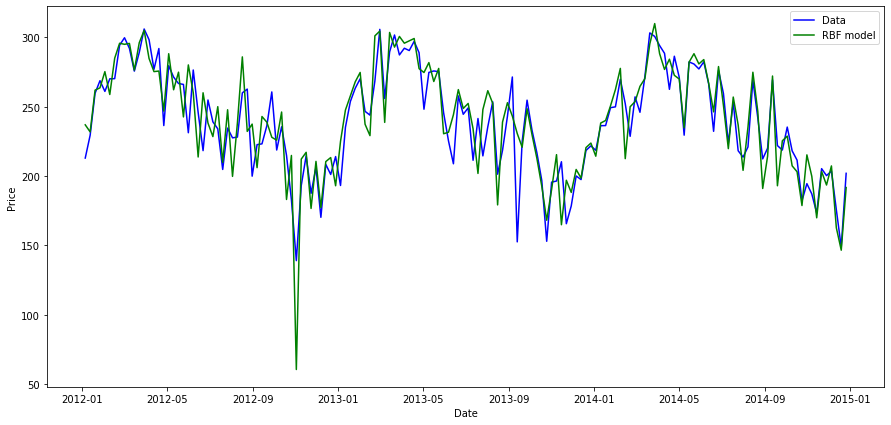

In [20]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'RBF model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))

18.427996699888464


In [22]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))

0.059347213994551035


In [23]:
X_train = y_w[:'2011']
X_test = y_w['2012':]

In [24]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(X_train, start_p=0, start_q=0,max_p=1,max_d=1,max_q=1, m=52,start_P=0,start_Q=0,max_P=1,max_D=1,max_Q=1, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
stepwise_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[52]             : AIC=6006.488, Time=2.23 sec
 ARIMA(1,1,0)(1,1,0)[52]             : AIC=5769.794, Time=5.73 sec
 ARIMA(0,1,1)(0,1,1)[52]             : AIC=inf, Time=29.31 sec
 ARIMA(1,1,0)(0,1,0)[52]             : AIC=5910.486, Time=0.77 sec
 ARIMA(1,1,0)(1,1,1)[52]             : AIC=inf, Time=24.84 sec
 ARIMA(1,1,0)(0,1,1)[52]             : AIC=inf, Time=14.23 sec
 ARIMA(0,1,0)(1,1,0)[52]             : AIC=5845.197, Time=4.30 sec
 ARIMA(1,1,1)(1,1,0)[52]             : AIC=inf, Time=46.48 sec
 ARIMA(0,1,1)(1,1,0)[52]             : AIC=inf, Time=22.52 sec
 ARIMA(1,1,0)(1,1,0)[52] intercept   : AIC=5771.790, Time=18.58 sec

Best model:  ARIMA(1,1,0)(1,1,0)[52]          
Total fit time: 169.011 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  626
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -2881.897
Date:                            Sun, 02 May 2021   AIC                           5769.794
Time:                                    12:05:02   BIC                           5782.847
Sample:                                         0   HQIC                          5774.886
                                            - 626                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3567      0.034    -10.356      0.000      -0.424      -0.289
ar.S.L52      -0.4846      0.033    -14.673      0.000      -0.549      -0.420
sigma2      1335.0853     73.851     18.078      0.000    1190.339    1479.831
===================================================================================
Ljung-Box (L1) (Q):                   5.86   Jarque-Bera (JB):                 9.30
Prob(Q):                              0.02   Prob(JB):                         0.01
Heteroskedasticity (H):               0.85   Skew:                            -0.27
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
stepwise_model.fit(X_train)
pred=stepwise_model.predict(n_periods=156)
pred

array([227.98927571, 231.76337555, 261.04672524, 266.85532456,
       287.6961605 , 288.22077476, 295.70614336, 261.42147029,
       304.24459225, 306.62221184, 309.23793792, 316.03379989,
       302.19252354, 301.73702972, 296.3042138 , 289.72041519,
       283.94099979, 286.83522194, 288.34597   , 259.42899822,
       296.27766608, 288.32608495, 248.3507747 , 234.72229831,
       259.00997249, 258.25433115, 246.07041753, 259.56520034,
       205.24929776, 229.04523805, 243.42934952, 272.33541977,
       229.60736315, 229.98286447, 226.2234761 , 226.83338992,
       241.54434061, 246.69230837, 264.04297901, 216.740899  ,
       209.32896687, 216.68041435, 181.63591   , 171.22248262,
       199.90453138, 202.3103218 , 205.35337728, 163.27510162,
       184.38470325, 198.10357074, 220.8421776 , 219.53559831,
       228.17329035, 253.24915705, 273.01408511, 281.05474989,
       295.866352  , 301.16305282, 303.64995054, 251.90415506,
       313.53366026, 315.02209428, 321.59033911, 321.99

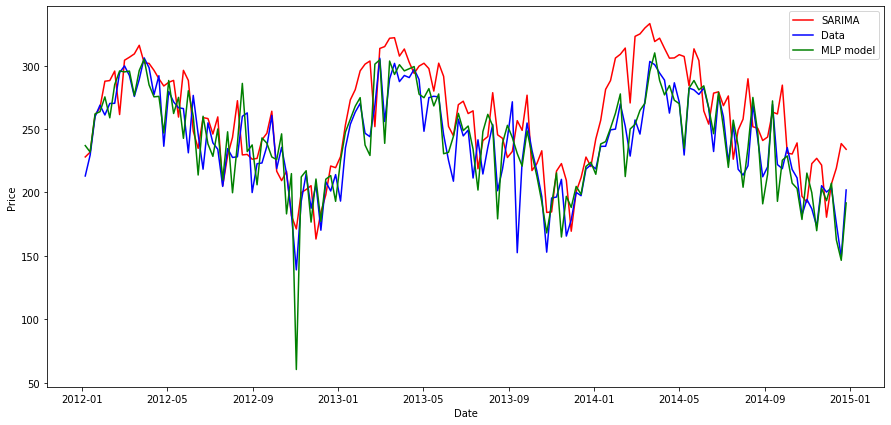

In [26]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, pred, color= 'red', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Data')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

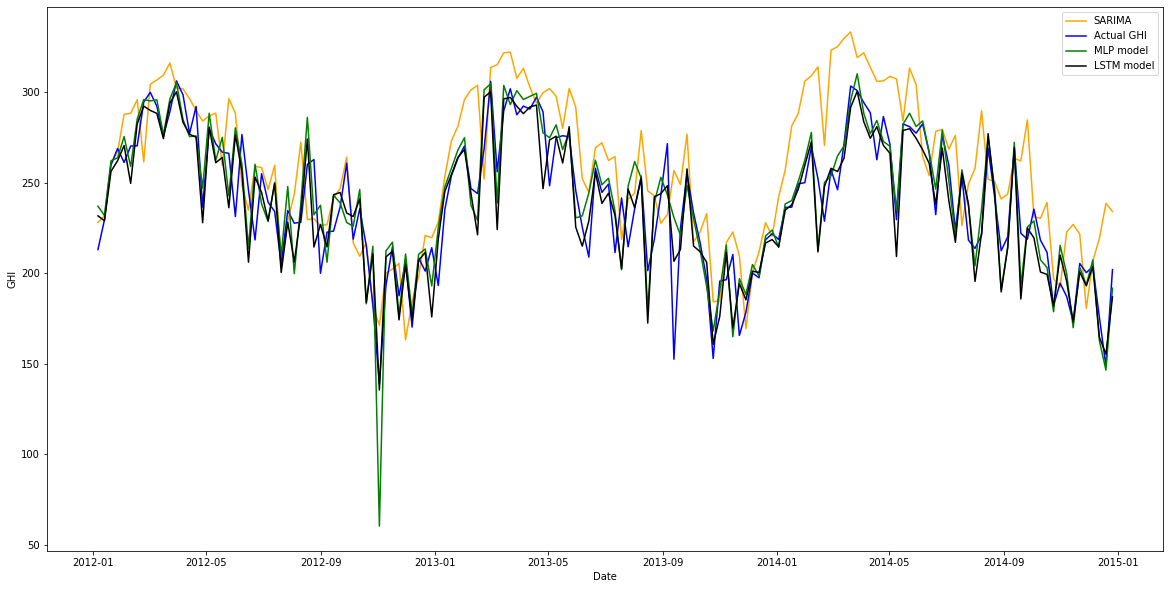

In [28]:
LSTM = pd.read_csv('/content/gdrive/My Drive/BITS/4-2/ASM_sop/Code/Karnataka1/LSTMweekly.csv')
plt.figure(figsize = (20,10))
plt.plot(y_w[626:-1].index, pred, color= 'orange', label= 'SARIMA')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'Actual GHI')
plt.plot(y_w[626:-1].index,np.asarray(yhat).reshape(156,) , color= 'green', label= 'MLP model') 
plt.plot(y_w[626:-1].index, LSTM['GHI'], color= 'black', label= 'LSTM model')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
hybrid=pd.DataFrame(columns=['Values','Model'])
for i in range (156):
  if abs(yhat[i]-y_w.iloc[626+i]['GHI'])<abs(pred[i]-y_w.iloc[626+i]['GHI']):
    hybrid.loc[i]=[yhat[i][0][0],-1]
  else:
    hybrid.loc[i]=[pred[i],1]
hybrid

,Values,Model
0,227.989276,1.0
1,230.235046,-1.0
2,261.046725,1.0
3,266.855325,1.0
4,273.946411,-1.0
...,...,...
151,188.598465,-1.0
152,206.572968,-1.0
153,165.641022,-1.0
154,147.776352,-1.0


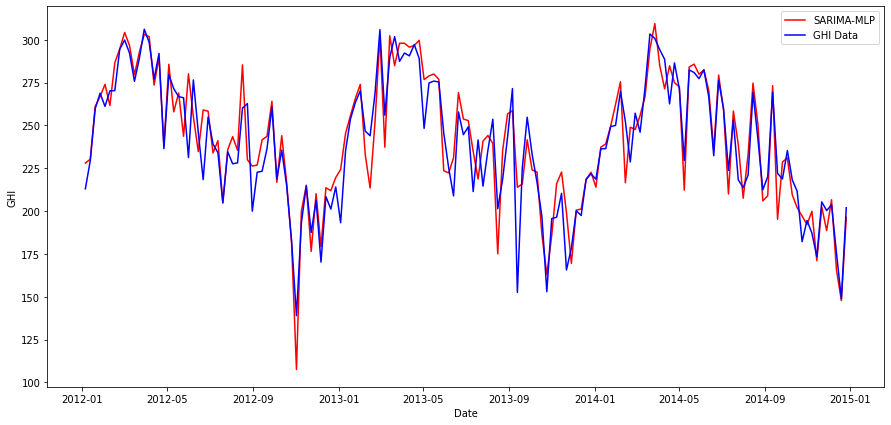

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(y_w[626:-1].index, hybrid['Values'], color= 'red', label= 'SARIMA-MLP')
#plt.scatter(y_w[626:678].index, hybrid['Model'][:52], color= 'red', label= 'hybrid1',marker='+')
#plt.scatter(y_w[626:678].index, hybrid['Model'][52:104], color= 'blue', label= 'hybrid2',marker='|',s=hybrid['Model'][52:104]*50)
#plt.scatter(y_w[626:678].index, hybrid['Model'][104:156], color= 'green', label= 'hybrid3',marker='_')
plt.plot(y_w[626:-1].index, y_w[626:-1], color= 'blue', label= 'GHI Data')
plt.xlabel('Date')
plt.ylabel('GHI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_w[626:-1],np.asarray(yhat).reshape(156,),squared=False))
print(mean_squared_error(y_w[626:-1],pred,squared=False))
print(mean_squared_error(y_w[626:-1],hybrid['Values'],squared=False))

17.322946018924096
31.880459147914728
14.44322557322637


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_w[626:-1],np.asarray(yhat).reshape(156,)))
print(mean_absolute_percentage_error(y_w[626:-1],pred))
print(mean_absolute_percentage_error(y_w[626:-1],hybrid['Values']))

0.057143546772653854
0.11146452697091207
0.04657717024284897
